**Задача №2**

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import skew
from statsmodels.distributions.empirical_distribution import ECDF
from math import *

**Пункт А**
Определить по выборке моду, медиану. размах, оценку коэффициента асимметрии

In [11]:
n = 25
sample = np.random.exponential(scale=1, size=n)
bootstrap_cnt = 10000
k_bootstrap = ceil(1 + log2(bootstrap_cnt))
k = ceil(1 + log2(n))

# Подсчет моды
mode = sample[np.argmax(np.bincount(sample.astype(int)))]
print(f"Mode: {mode:.2f}")

# Подсчет медианы
median = np.median(sample)
print(f"Median: {median:.2f}")

# Подсчет размаха
range_ = np.ptp(sample)
print(f"Range: {range_:.2f}")

# Подсчет оценки коэффициента асимметрии
skewness = skew(sample)
print(f"Skewness: {skewness:.2f}")

Mode: 0.05
Median: 0.69
Range: 3.29
Skewness: 0.90


**Пункт Б**
Построить эмпирическую функцию распределения, гистограмму и boxplot

Text(0.5, 1.0, 'Эмпирическая функция распределения')

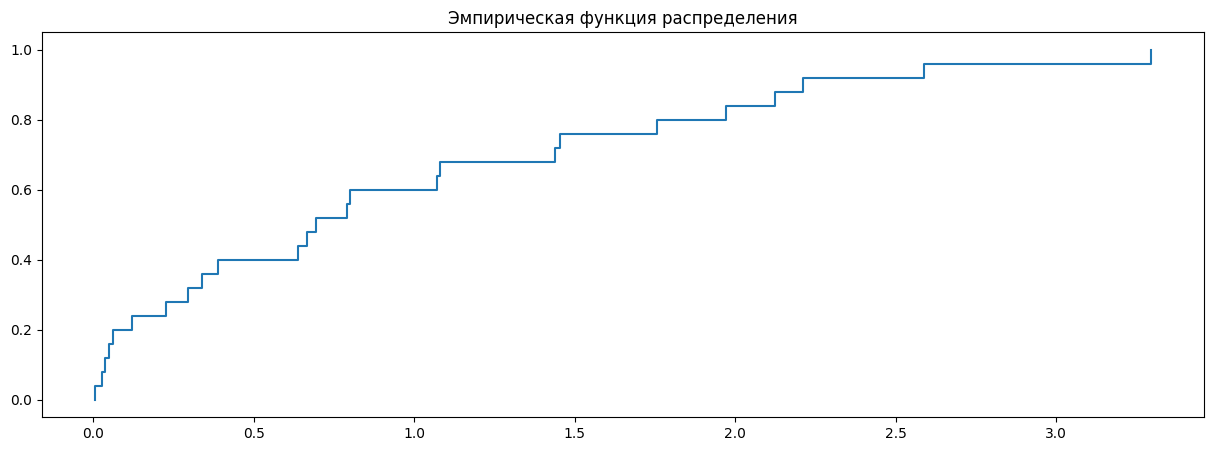

In [12]:
plt.figure(figsize=(15, 5))

# Эмпирическая функция распределения
plt.subplot(1, 1, 1)
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, where="post")
plt.title("Эмпирическая функция распределения")

Text(0.5, 1.0, 'Гистограмма')

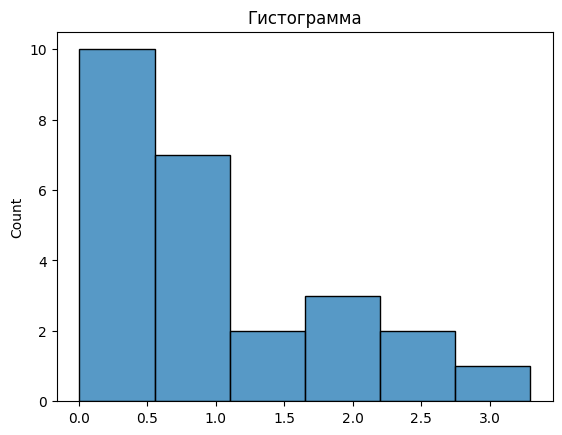

In [13]:
# Гистограмма

plt.subplot(1, 1, 1)
sns.histplot(sample, bins=ceil(k), kde=False)
plt.title("Гистограмма")

Text(0.5, 1.0, 'Boxplot')

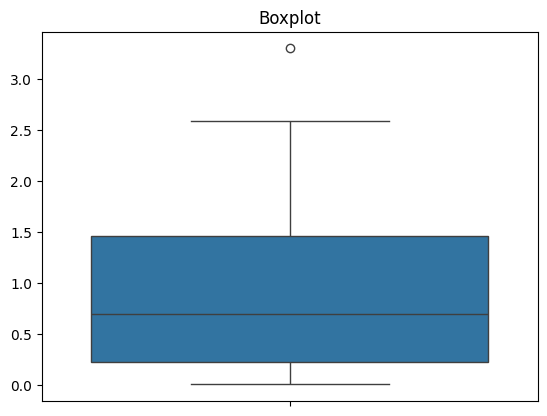

In [14]:
# Boxplot

plt.subplot(1, 1, 1)
sns.boxplot(sample)
plt.title("Boxplot")

**Пункт С**
Сравнить оценку плотности распределения среднего арифметического элементов выборки, полученную с помощью ЦПТ, с бутстраповской оценкой этой плотности

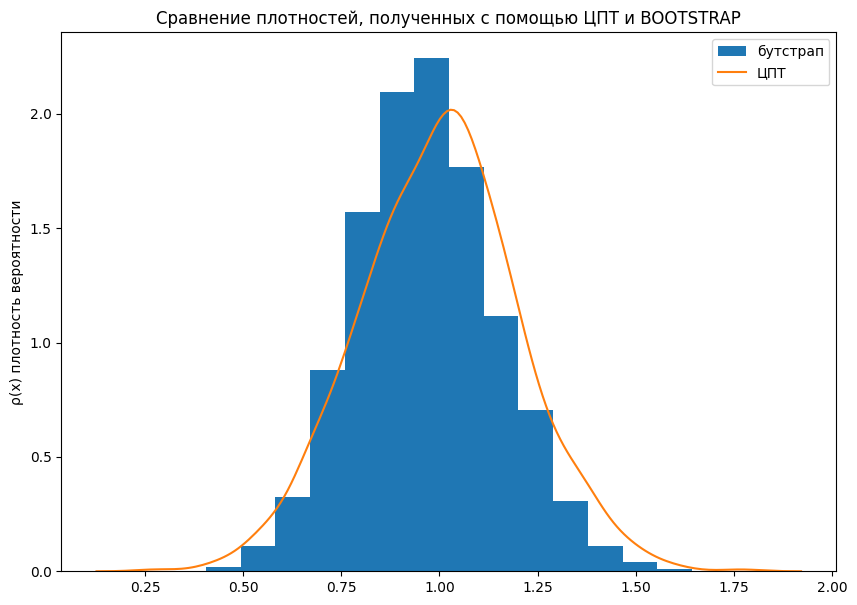

In [15]:
_, axs = plt.subplots(1, 1, figsize=(10, 7))
bootstrap_means = [np.mean(np.random.choice(sample, size=n, replace=True)) for _ in range(bootstrap_cnt)]

axs.set_ylabel("ρ(x) плотность вероятности")
axs.set_title("Сравнение плотностей, полученных с помощью ЦПТ и BOOTSTRAP")

axs.hist(bootstrap_means, bins=k_bootstrap, density=True, label="бутстрап")
# 1/5 - сигма, с.м. приложение к файлу да
sns.kdeplot(np.random.normal(1, 1/5, size=1000), label="ЦПТ")
plt.legend()
plt.show()

**Пункт D**
Найти бутстраповскую оценку плотности распределения коэффициента асимметрии и оценить вероятность того, что коэффициента асимметрии будет меньше 1

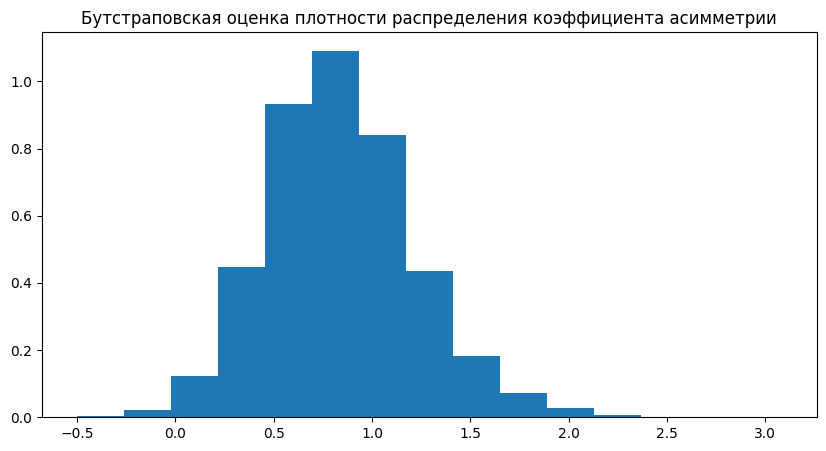

P(skewness < 1): 0.69


In [16]:
bootstrap_skewness = [skew(np.random.choice(sample, size=n, replace=True)) for _ in range(bootstrap_cnt)]
plt.figure(figsize=(10, 5))
plt.hist(bootstrap_skewness, bins=k_bootstrap, density=True, label="Плотность")
plt.title('Бутстраповская оценка плотности распределения коэффициента асимметрии')
plt.show()
probability = np.mean(np.array(bootstrap_skewness) < 1)
print(f"P(skewness < 1): {probability:.2f}")

**Пункт E**
Сравнить плотность распределения медианы выборки с бутстраповской оценкой этой плотности

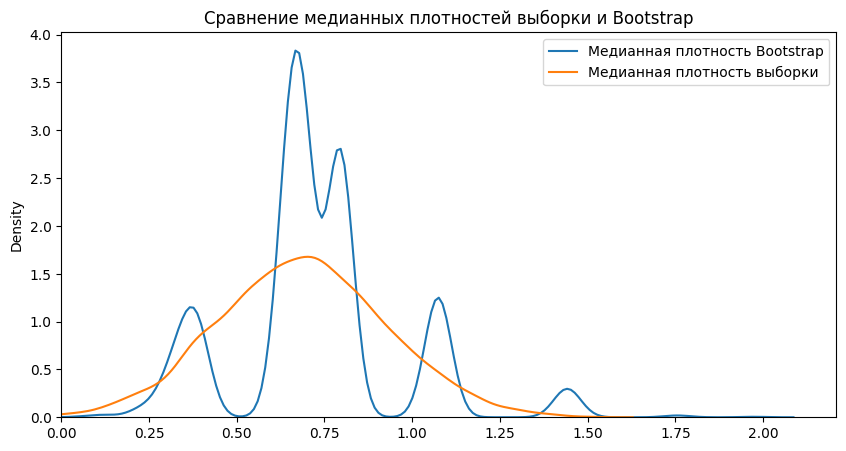

In [17]:
bootstrap_medians = [np.median(np.random.choice(sample, size=n, replace=True)) for _ in range(bootstrap_cnt)]
plt.figure(figsize=(10, 5))
sns.kdeplot(bootstrap_medians, label="Медианная плотность Bootstrap")
sns.kdeplot(np.random.normal(median, np.std(bootstrap_medians), size=bootstrap_cnt), label="Медианная плотность выборки")
plt.legend()
plt.title("Сравнение медианных плотностей выборки и Bootstrap")
plt.xlim(xmin=0)
plt.show()

**Справка по использованным функциям из различных библиотек**
np.random.exponential(scale=1, size=n) - генерация выборки из 25 значений, распределенных по экспоненциальному закону
np.argmax(np.bincount(sample.astype(int))) - подсчет поды выборки
np.median(sample) - вычисление медианы
np.ptp(sample) - вычисление размаха выборки
skew(sample) - оценка коэффициента асимметрии выборки
np.random.choice(sample, size=n, replace=True) - создание бутстраповской выборки
np.mean() - вычисление среднего значения по бутстраповской выборке
np.random.normal(np.mean(sample), np.std(sample)/np.sqrt(n), size=10000) - генерация 10000 значения из нормального распределения, используя ЦПТ